# Finite Difference Methods

## Finite Difference Methods
Finite Difference Methods (FDM) are one of the popular numerical methods used in computational finance. FDM are discretizations used for solving differential equations by approximating them with difference equations. It is one of the simplest and the oldest methods to solve differential equations. These techniques were applied to numerical applications as early as 1950s.

FDM are similar in approach to the (binomial) tress. However, instead of discretising asset prices and the passage of time in a tree structure, it discretises in a **grid** - with time and price steps - by calculating the value at every possible grid points.

**Explicit, Implicit and Crank-Nicolson** are the three popular approaches of FDM. The explicit methods are simple to implement, but it does not always converge and largely depends on the size of the time and asset step. **Explicit methods are unstable when compared to other two methods. Finite Difference approach is peferred for low dimensional problem, usually upto 4 dimensions**.

## Differentiation Using The Grid
The Binomial method contains the diffusion - the volatility - in the tree structure whereas in FDM, the '**tree**' is fixed and we change the parameters to reflect the changing diffusion. We will now define the grid by specifying the time step $\delta t$ and asset step $\delta s$ and discretise $S$ and $t$ as

$$S = i \delta s$$

, and time to maturity as (P.S. time is backward from the maturity to the beginning)

$$t= T -k \delta t$$

where $0\leq i \leq I$, and $0\leq k \leq K$

Here $i$ and $k$ are respective steps in the grid and we can write the value of the option at each grid points as (time is always on the superscript)

$$V_i^k = (i\delta s, T - k\delta t)$$

## Approximating Greeks
The greeks terms, the Black–Scholes equation can be written as,

$$\Theta + \frac{1}{2}\sigma^2 S^2 \Gamma  + rS\Delta - r V = 0$$

Assume that we know the option value at each grid points, we can extract the derivatives of the option using Taylor series expansion.

### Approximating $\Theta$

We know that the first derivative of option as,

by T.S.E.,

$$V(S,t+h) = V(S,t) + h\frac{\partial V}{\partial t} + \frac{1}{2!}h^2 \frac{\partial^2 V}{\partial t^2} + ...$$

$$V(S,t+h) - V(S,t) = h\frac{\partial V}{\partial t} + O(h^2)$$

$$\frac{\partial V}{\partial t} = \frac{V(S,t+h) - V(S,t)}{h} + O(h)$$

$$ \frac{\partial V}{\partial t} = \lim_{h\to 0}  \frac{V(S, t+h) - V(S,t)}{h} $$

We can then approximate the time derivative from the grid using,

$$ \frac{\partial V}{\partial t} (S,t) \approx \frac{ V_i^k - V_i^{k+1} }{\delta t} $$

### Approximating $\Delta$

We know that the central difference has much lower error when compared to forward and backward differences. Accordingly, we can approximate the first derivative of option with respect to the underlying as,

Here, we expand T.D.E. in three and more terms to approximate, because that would reduce the power of error terms.

$$V(S+\delta s,t) = V(S,t) + (\delta s)\frac{\partial V}{\partial S} + \frac{1}{2!}(\delta s)^2 \frac{\partial^2 V}{\partial S^2} + \frac{1}{3!}(\delta s)^3 \frac{\partial^3 V}{\partial S^3}...$$

, and

$$V(S-\delta s,t) = V(S,t) - (\delta s)\frac{\partial V}{\partial S} + \frac{1}{2!}(\delta s)^2 \frac{\partial^2 V}{\partial S^2} - \frac{1}{3!}(\delta s)^3 \frac{\partial^3 V}{\partial S^3}...$$

, and make a difference,

$$V(S+\delta s,t) - V(S-\delta s,t) = 2(\delta s)\frac{\partial V}{\partial S} + O((\delta s)^3)$$

$$\frac{V(S+\delta s,t) - V(S-\delta s,t)}{2(\delta s)} = \frac{\partial V}{\partial S} + O((\delta s)^2)$$

, through this way that expanding in three and more terms and make a difference, we can get the error $O((\delta s)^2)$. If not make a difference, to get $\frac{V(S+\delta s,t) - V(S,t)}{\delta s} = \frac{\partial V}{\partial S} + O(\delta s)$, then there would be an error $ O(is)$.

$$ \frac{\partial V}{\partial S} (S,t) \approx \frac{ V_{i+1}^k - V_{i-1}^{k} }{2\delta s} $$

### Approximating $\Gamma$

The gamma of the option is the second derivative of option with respective to the underlying and approximating it we have,

$$ \frac{\partial^2 V}{\partial S^2} (S,t) \approx \frac{ V_{i+1}^k + V_{i-1}^{k} - 2V_{i}^{k} }{\delta s^2} $$

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

from PIL import Image
import cufflinks as cf
cf.set_config_file(offline=True)

# Set max row and columns to 50
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

**Example**

Suppose that we know the value of the option on the below grid points, we can then easily evaluate the greeks as follows

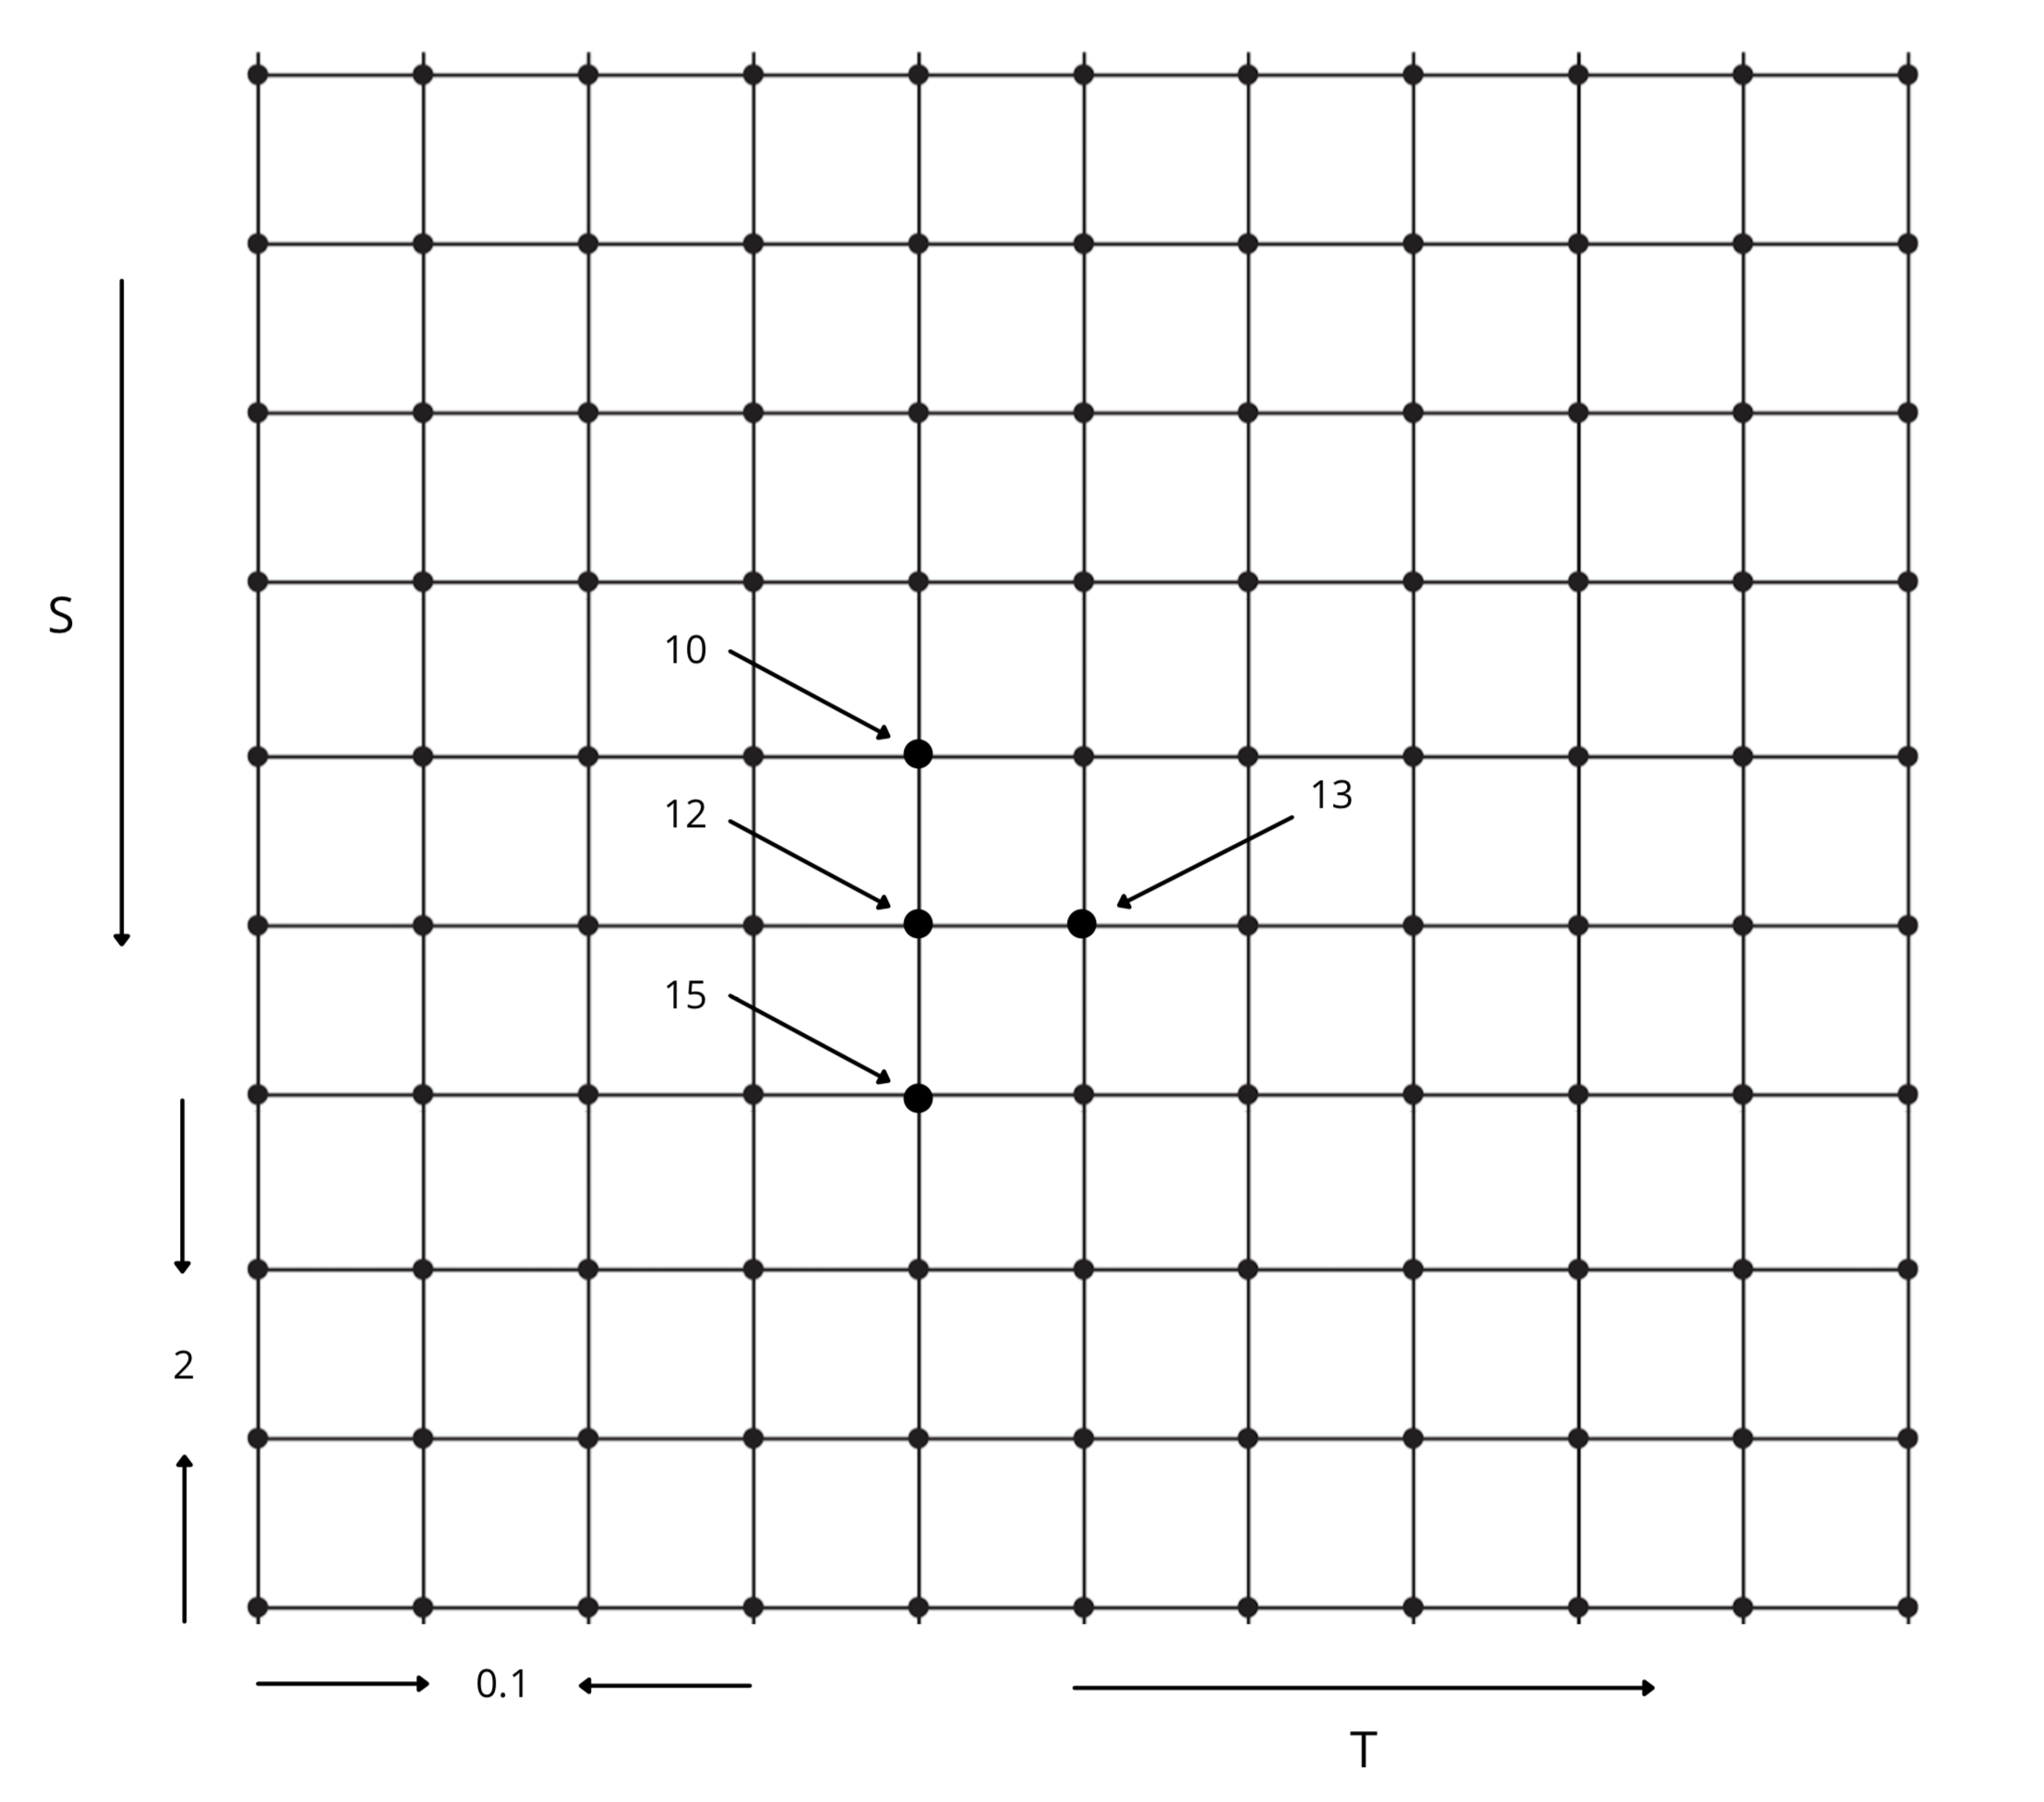

From the grid, we can estimate the

$$\Theta = \frac{12-13}{0.1} = -10$$

$$\Delta = \frac{15-10}{2 \times 2} = 1.25$$

$$\Gamma = \frac{15 - 2\times 12 + 10}{2\times 2} = 0.25$$

Black Scholes Equation is a relationship between the option value and greeks. If we know the option value at the expiration, we can step back to get the values prior to it such that $V_k^i = V_{k-1}^i - \Theta \times dt$. This approach is called Explicit Finite Difference Method because the relationship between the option values at time step $k$ is a simple function of the option values at time step $k-1$.



## Option Pricing Techniques
As with other option pricing techniques Explicit Finite Difference methods are used to price options using what is essentially a three step process.

- Step 1: Generate the grid by specifying grid points.
- Step 2: Specify the final or initial conditions.
- Step 3: Use boundary conditions to calculate option values and step back down the grid to fill it.

**European Option**

To price an option, we generate a finite grid of a specified asset and time steps for a given maturity. Next, we specify the initial and boundary conditions to calculate payoff when S and T equals zero. We then step back to fill the grid with newer values derived from the earlier values.

**Specify Parameters**,   $V_i^k$

For the Stability condition,

$$\delta t < \frac{1}{\sigma^2 N^2}$$

In [2]:
# Specify the parameters for FDM 
T    = 1                              # time to maturity in years
E    = 100                            # strike price
r    = .05                            # riskfree rate
vol  = .20                            # volatility
Flag = 1                              # Flag = 1 for call, -1 for puts
NAS  = 20                             # number of asset steps                      'i'

ds   = 2* E / NAS                     # asset step size
dt   = (0.9/vol**2/NAS**2)            # time step size, for stability    Stability Condition derived from Fourier

NTS  = int(T / dt) + 1                # number of time steps                       'k'
dt   = T / NTS                        # time step size [Expiration as int # of time steps away]

## Generate Grid
Build the grid with the above input parameters

In [3]:
# Create asset steps i*ds
s = np.arange(0, (NAS+1)*ds,ds)
print(s)

print('-'*50)
# Create time steps k*dt
t = T-np.arange(NTS*dt,-dt,-dt)
print(np.around(t,3))

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200.]
--------------------------------------------------
[0.    0.056 0.111 0.167 0.222 0.278 0.333 0.389 0.444 0.5   0.556 0.611
 0.667 0.722 0.778 0.833 0.889 0.944 1.   ]


In [4]:
# Initialize the grid with zeros
grid = np.zeros((len(s),len(t)))

# Subsume the grid points into a dataframe
# with asset price as index and time steps as columns
grid = pd.DataFrame(grid, index=s, columns=np.around(t,3))
grid

,0.000,0.056,0.111,0.167,0.222,0.278,0.333,0.389,0.444,0.500,0.556,0.611,0.667,0.722,0.778,0.833,0.889,0.944,1.000
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Specify Condition
Specify final condition and payoffs

$$V_i^0 = max(i\delta s - E , 0)$$

In [5]:
# Set Final or Initial condition at Expiration
# for the '0th' column only, let's have a look
if Flag == 1:    # for call option
    grid.iloc[:,0] = np.maximum(s - E, 0)
else:    # for put option
    grid.iloc[:,0] = np.maximum(E - s, 0)
    
# Verify the grid
grid

,0.000,0.056,0.111,0.167,0.222,0.278,0.333,0.389,0.444,0.500,0.556,0.611,0.667,0.722,0.778,0.833,0.889,0.944,1.000
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Fill the Grid
Specify boundary condition at $S = 0$

$$V_0^k = (1-r\delta t) V_0^{k-1}$$

Specify boundary condition at $S = \infty$

$$V_i^k = 2V_{i-1}^k - V_{i-2}^k$$

---
We backward induct, 

$$V_k^i = V_{k-1}^i - \Theta \times dt$$

$\Theta$ is getting from the Black-Schole fomula,

$$\Theta + \frac{1}{2}\sigma^2 S^2 \Gamma  + rS\Delta - r V = 0$$

In [6]:
# k is counter
for k in range(1, len(t)):
    for i in range(1,len(s)-1):
        delta = (grid.iloc[i+1,k-1] - grid.iloc[i-1,k-1]) / (2*ds)
        gamma = (grid.iloc[i+1,k-1]-2*grid.iloc[i,k-1]+grid.iloc[i-1,k-1]) / (ds**2)
        # theta from BS fomula
        theta = (-0.5* vol**2 * s[i]**2 * gamma) - (r*s[i]*delta) + (r*grid.iloc[i,k-1])
        # backward induction
        grid.iloc[i,k] = grid.iloc[i,k-1] - (theta*dt)
    
    # Set boundary condition at S = 0
    grid.iloc[0,k] = grid.iloc[0,k-1] * (1-r*dt) # ds = rsdt + sigma*sdx, s= 0, ds = 0 
    
    # Set boundary condition at S = infinity  # gamma = 0, so you can linearly extract
    grid.iloc[len(s)-1,k] = 2*grid.iloc[len(s)-2,k] - grid.iloc[len(s)-3,k]

# Round grid values to 2 decimals
grid = np.around(grid,3)

# Output the option values
grid.iloc[0:15,:]

,0.000,0.056,0.111,0.167,0.222,0.278,0.333,0.389,0.444,0.500,0.556,0.611,0.667,0.722,0.778,0.833,0.889,0.944,1.000
0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
20.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
30.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
40.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.001,0.002,0.003,0.004,0.006
60.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.003,0.004,0.007,0.011,0.016,0.023,0.031,0.041,0.053,0.066
70.0,0.0,0.000,0.000,0.000,0.001,0.003,0.008,0.016,0.028,0.045,0.067,0.094,0.126,0.164,0.207,0.255,0.308,0.367,0.430
80.0,0.0,0.000,0.000,0.011,0.037,0.080,0.141,0.218,0.310,0.416,0.534,0.662,0.799,0.944,1.096,1.253,1.416,1.583,1.754
90.0,0.0,0.000,0.128,0.336,0.592,0.878,1.182,1.495,1.812,2.131,2.450,2.766,3.080,3.392,3.700,4.004,4.306,4.604,4.899


## Visualize the payoff

In [7]:
# Plot Call Option Payoff
grid.iloc[0:,:].iplot(kind = 'surface', title='Call Option values by Explicit FDM')

## Bilinear Interpolation

As the grid is not continuous, Bilinear Interpolation is a method to calculate the value of option that is not straightly on the point of the grid. 

We have generated the grid and filled it with the possible option values. However, if we have to estimate option value or its derivatives on the mesh points, how can we estimate the value at points in between? The simplest way is to do a two-dimensional interpolation method called Bilinear Interpolation.

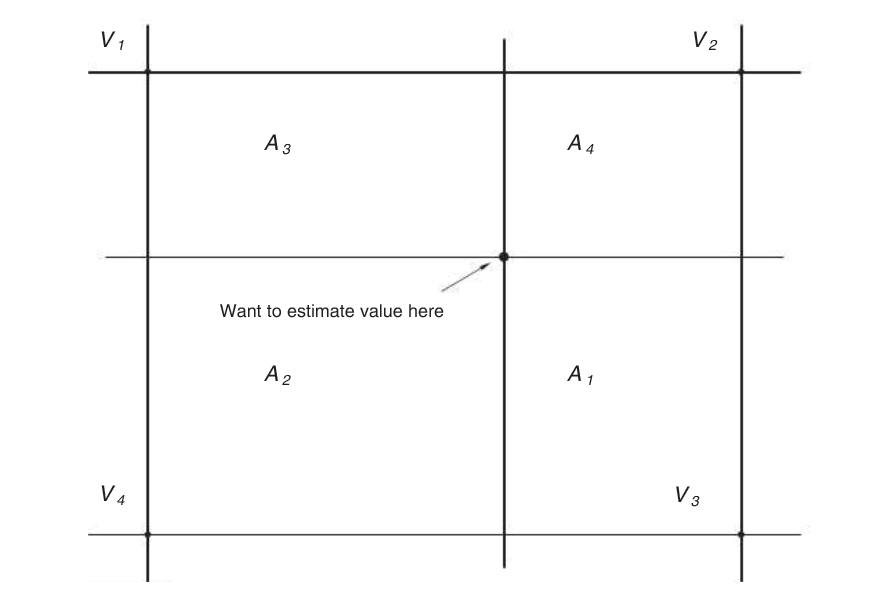

The option value can be estimated using the values from the nearest neighbouring values. Assume $V_1, V_2, V_3, V_4$
 are the option values from the nearest neighbour and $A_1, A_2, A_3, A_4$ are the areas of the rectanges made by the four corners and the interior points, we can approximate the option value at the interior points as,
 
 $$\frac{\sum_1^4 A_i V_i}{\sum_1^4 A_i}$$

In [8]:
def bilinear_interpolation(asset_price, ttm, df):

    # Find relevant rows and columns
    # asset_price, and ttm are the location, or (x-axis, y-axis). 
    # We aim the find four V_i^k that are most close to that loc
    col1 = df.columns[df.columns < ttm][-1] # find the time location that is most left close to the 'ttm'
    col2 = df.columns[df.columns >= ttm][0] # most right close to the 'ttm'
    row1 = df.index[df.index < asset_price,][-1]
    row2 = df.index[df.index >= asset_price,][0]
   
    # Define points and areas
    # option values from the nearest neighbour 
    V = [df.loc[row1, col1], df.loc[row1, col2],
           df.loc[row2, col2], df.loc[row2, col1]]
    # areas of the rectanges made by the four corners and the interior points,      
    A = [(row2 - asset_price) * (col2 - ttm),
           (row2 - asset_price) * (ttm - col1),
           (asset_price - row1) * (ttm - col1),
           (asset_price - row1) * (col2 - ttm)]
   
    # Interpolate values
    return sum(np.array(V)*np.array(A))/sum(np.array(A))

In [9]:
# Option value, approximated
bilinear_interpolation(105,0.3,grid)

8.4765

In [10]:
# Verify rows and columns
# col1 = grid.columns[grid.columns < 0.3][-1]
# col2 = grid.columns[grid.columns >= 0.3][0]
# row1 = grid.index[grid.index < 110][-1]
# row2 = grid.index[grid.index >= 110][0]

# Nearest neighbours grid points
# [row1,col1], [row1, col2], [row2, col2], [row2, col1]

# Get option values
# V = [grid.loc[row1,col1], grid.loc[row1,col2], grid.loc[row2, col2], grid.loc[row2, col1]]

# Areas of the rectangle made by four corners and interior points
# A = [(row2-105) * (col2-0.3),
#      (row2-105) * (0.3-col1),
#      (105-row1) * (0.3-col1),
#      (105-row1) * (col2-0.3)]

# Option value in mesh points, approximated
# sum(array(V)*array(A))/sum(array(A))

## Write the Grid (FDM) in a Function
Let's subsume above grid calculation into a function for ease of use.

In [11]:
def efdm_grid(Strike, Volatility, Rate, TTM, NAS, Flag=1): 
    # NAS is the # of step from the Right-side to our target, the more NAS, the more accurate the FDM result.
    
    # Specify Flag as 1 for calls and -1 for puts
    
    ds = 2*Strike/NAS                   # asset step size
    dt = 0.9/Volatility**2/NAS**2       # for stability
    
    NTS = int(TTM / dt) + 1             # time step size, alternatively use fixed size 10 on stability issue 
    dt = TTM/NTS                        # time step
    
    s = np.arange(0,(NAS+1)*ds,ds)
    t = TTM-np.arange(NTS*dt,-dt,-dt)
    
    # Initialize the grid with zeros
    grid = np.zeros((len(s),len(t)))
    grid = pd.DataFrame(grid, index=s, columns=np.around(t,2))
    
    # Set boundary condition at Expiration
    grid.iloc[:,0] = abs(np.maximum(Flag * (s - Strike), 0))
        
    for k in range(1, len(t)):
        for i in range(1,len(s)-1):
            delta = (grid.iloc[i+1,k-1] - grid.iloc[i-1,k-1]) / (2*ds)
            gamma = (grid.iloc[i+1,k-1]-2*grid.iloc[i,k-1]+grid.iloc[i-1,k-1]) / (ds**2)
            theta = (-0.5* vol**2 * s[i]**2 * gamma) - (r*s[i]*delta) + (r*grid.iloc[i,k-1])

            grid.iloc[i,k] = grid.iloc[i,k-1] - dt*theta
    
        # Set boundary condition at S = 0
        grid.iloc[0,k] = grid.iloc[0,k-1] * (1-r*dt)

        # Set boundary condition at S = infinity
        grid.iloc[len(s)-1,k] = abs(2*(grid.iloc[len(s)-2,k]) - grid.iloc[len(s)-3,k])
            
    # round grid values to 4 decimals
    return np.around(grid,2)

In [12]:
# Call the function for put option
fdm_puts = efdm_grid(100,0.2,0.05,1,20,Flag = -1) # flag = -1 is for put, flag = 1 is for call option
fdm_puts

,0.00,0.06,0.11,0.17,0.22,0.28,0.33,0.39,0.44,0.50,0.56,0.61,0.67,0.72,0.78,0.83,0.89,0.94,1.00
0.0,100.0,99.72,99.45,99.17,98.89,98.62,98.34,98.07,97.80,97.53,97.26,96.99,96.72,96.45,96.18,95.91,95.65,95.38,95.12
10.0,90.0,89.72,89.45,89.17,88.89,88.62,88.34,88.07,87.80,87.53,87.26,86.99,86.72,86.45,86.18,85.91,85.65,85.38,85.12
20.0,80.0,79.72,79.45,79.17,78.89,78.62,78.34,78.07,77.80,77.53,77.26,76.99,76.72,76.45,76.18,75.91,75.65,75.38,75.12
30.0,70.0,69.72,69.45,69.17,68.89,68.62,68.34,68.07,67.80,67.53,67.26,66.99,66.72,66.45,66.18,65.91,65.65,65.38,65.12
40.0,60.0,59.72,59.45,59.17,58.89,58.62,58.34,58.07,57.80,57.53,57.26,56.99,56.72,56.45,56.18,55.91,55.65,55.38,55.12
50.0,50.0,49.72,49.45,49.17,48.89,48.62,48.34,48.07,47.80,47.53,47.26,46.99,46.72,46.45,46.18,45.92,45.65,45.39,45.12
60.0,40.0,39.72,39.45,39.17,38.89,38.62,38.35,38.07,37.80,37.53,37.26,36.99,36.73,36.46,36.20,35.94,35.69,35.43,35.18
70.0,30.0,29.72,29.45,29.17,28.89,28.62,28.35,28.09,27.83,27.57,27.32,27.08,26.84,26.61,26.39,26.17,25.96,25.75,25.55
80.0,20.0,19.72,19.45,19.18,18.93,18.70,18.49,18.29,18.11,17.94,17.79,17.65,17.52,17.39,17.28,17.17,17.06,16.96,16.87
90.0,10.0,9.72,9.57,9.50,9.49,9.50,9.53,9.57,9.61,9.66,9.71,9.75,9.80,9.84,9.88,9.92,9.95,9.98,10.01


In [13]:
# Visualize the plot for put option
fdm_puts.iplot(kind='surface', title='Put Option values by Explicit FDM')

## Convergence Analysis
Let's now Compare option pricing for various asset steps (NAS) with black scholes price.

In [14]:
# Iterate over asset steps (NAS)
nas_list = [10,20,30,40,50,60]
fdmoption = []
for i in nas_list:
    fdmoption.append(efdm_grid(100,0.2,0.05,1,i).loc[100,1]) 
    # .loc[100,1] specify that Spot price =100, date to expire = 1
fdmoption

[9.51, 10.26, 10.37, 10.4, 10.42, 10.43]

In [15]:
import sys
path = r'/Users/mie/Documents/GitHub/Python_CheatSheet/'
sys.path.append(path)

from cqf_module.BlackSchole import BS

In [16]:
# Instantiate black scholes object
option = BS(100,100,0.05,1,0.20)
bsoption = round(option.callPrice,2)
bsoption = bsoption.repeat(len(nas_list))

# Range of option price
bsoption

array([10.45, 10.45, 10.45, 10.45, 10.45, 10.45])

In [17]:
# Subsume into dataframe
df = pd.DataFrame(list(zip(bsoption,fdmoption)), columns=['BS', 'FDM'], index=nas_list)
df['dev'] = df['FDM'] - df['BS']

# Output
print("BS - FDM Convergence over NAS")
print('We can find from the Table, the value of option goes close to the B-S value as NAS increasing')
df

BS - FDM Convergence over NAS
We can find from the Table, the value of option goes close to the B-S value as NAS increasing


,BS,FDM,dev
10,10.45,9.51,-0.94
20,10.45,10.26,-0.19
30,10.45,10.37,-0.08
40,10.45,10.40,-0.05
50,10.45,10.42,-0.03
60,10.45,10.43,-0.02
